<center>
<h1>Fake news detection using graph neural network</h1>
<h2>Graph Attention Network (GAT) GNN</h2>
<i><h6>Victor GOUBET | Nicholas Tagliapietra | Asma Bakhtiariazad</h6></i>
</center>


----

# Library

In [1]:
import torch
import pickle as pk
import torch.nn.functional as F

from torch.nn import Linear, LogSoftmax
from tool_box.upfd_dataset import ext_UPFD
from tool_box.GNN_train import plot_hist, train_all_and_optimize
from torch_geometric.nn import GATConv, global_mean_pool, global_max_pool

# Import datasets

In [2]:
datasets = pk.load(open('../data/datasets.pkl', 'rb'))

# Define the model

In [3]:
class GAT(torch.nn.Module):
    
    def __init__(self, num_n_feature, num_g_feature, emb_size):
        super(GAT, self).__init__()
        torch.manual_seed(42)
        self.emb_size = emb_size
        
        self.in_gat1_layer = GATConv(num_n_feature, emb_size)
        self.gat2 = GATConv(emb_size, emb_size)

        # check if we have graph features to concatenate or not
        i = 2
        if num_g_feature:
             self.lin_g = Linear(num_g_feature, emb_size)
             i = 3

        self.out_layer = Linear(i * emb_size, 2)
        self.act = LogSoftmax(dim=-1)

    def forward(self, x, edges_idx, batch_idx, g_features):

        x = self.in_gat1_layer(x, edges_idx)

        x = self.gat2(x, edges_idx)

        flatten = torch.cat([global_mean_pool(x, batch_idx),
                             global_max_pool(x, batch_idx)], axis=1)
        
        if g_features.size()[-1] > 1:
            g_ft = self.lin_g(g_features)
            flatten = torch.cat([flatten, g_ft], axis=1)

        out = self.act(self.out_layer(flatten))

        return out

# Training

In [4]:
models = train_all_and_optimize(GAT, datasets, epochs = 60)

[I 2022-01-03 18:39:50,117] A new study created in memory with name: no-name-109faa15-6a2e-4057-a1c6-383fb2e8476d


--> Train on: origin


[I 2022-01-03 18:42:24,034] Trial 0 finished with value: 0.9276194852941176 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 0 with value: 0.9276194852941176.
[I 2022-01-03 18:54:58,848] Trial 1 finished with value: 0.9041245404411764 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 0 with value: 0.9276194852941176.
[I 2022-01-03 18:56:21,529] Trial 2 finished with value: 0.9015778186274509 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 256, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.9276194852941176.
[I 2022-01-03 18:57:52,282] Trial 3 finished with value: 0.8434053308823529 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 100}. Best is trial 0 with value: 0.9276194852941176.
[I 2022-01-03 19:00:43,419] Trial 4 finished with value: 

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.3215163588523865  loss_val=0.3240644832452138 | acc_train=0.8545496323529411  acc_val=0.8506433823529411
Epochs: 20 | loss_train=0.2066129058599472  loss_val=0.2013073911269506 | acc_train=0.9153492647058824  acc_val=0.9021905637254902
Epochs: 30 | loss_train=0.15749408304691315  loss_val=0.19089752435684204 | acc_train=0.9351102941176471  acc_val=0.9237132352941176
Epochs: 40 | loss_train=0.14293960034847258  loss_val=0.20236567159493765 | acc_train=0.953125  acc_val=0.9185049019607843
Epochs: 50 | loss_train=0.1326559603214264  loss_val=0.15284492820501328 | acc_train=0.9540900735294118  acc_val=0.9381127450980392
Epochs: 60 | loss_train=0.15017956644296646  loss_val=0.16837907334168753 | acc_train=0.9378216911764706  acc_val=0.9394148284313726


[I 2022-01-03 19:10:37,105] A new study created in memory with name: no-name-2fed6359-a634-4db3-b62e-5ccb0087467d


--> Train on: dataset1


[I 2022-01-03 19:11:50,042] Trial 0 finished with value: 0.8492647058823529 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8492647058823529.
[I 2022-01-03 19:12:35,178] Trial 1 finished with value: 0.8604779411764707 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.01, 'batch_size': 128, 'embedding_space_dim': 60}. Best is trial 1 with value: 0.8604779411764707.
[I 2022-01-03 19:13:44,507] Trial 2 finished with value: 0.8657322303921569 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 256, 'embedding_space_dim': 100}. Best is trial 2 with value: 0.8657322303921569.
[I 2022-01-03 19:15:48,951] Trial 3 finished with value: 0.8444967830882353 and parameters: {'learning_rate': 0.001, 'weight_decay': 0.001, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 2 with value: 0.8657322303921569.
[I 2022-01-03 19:17:08,643] Trial 4 finished with value: 0.8

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.4184899065229628  loss_val=0.40933754444122317 | acc_train=0.8209763071895425  acc_val=0.8080882352941176
Epochs: 20 | loss_train=0.3085300624370575  loss_val=0.7678983807563782 | acc_train=0.8794934640522876  acc_val=0.8158088235294118
Epochs: 30 | loss_train=0.28252943522400326  loss_val=0.2762299358844757 | acc_train=0.8907781862745099  acc_val=0.8705882352941176
Epochs: 40 | loss_train=0.6395395116673576  loss_val=0.47582627534866334 | acc_train=0.8650428921568627  acc_val=0.8764705882352942
Epochs: 50 | loss_train=0.21431778205765617  loss_val=0.3008756279945374 | acc_train=0.9154411764705882  acc_val=0.8858455882352942
Epochs: 60 | loss_train=0.18006816506385803  loss_val=0.24374258816242217 | acc_train=0.9270322712418301  acc_val=0.9112132352941176


[I 2022-01-03 19:27:24,999] A new study created in memory with name: no-name-7024748e-504c-40fb-9506-d08083be5504


--> Train on: dataset2


[I 2022-01-03 19:28:18,986] Trial 0 finished with value: 0.8662683823529411 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 128, 'embedding_space_dim': 80}. Best is trial 0 with value: 0.8662683823529411.
[I 2022-01-03 19:30:23,944] Trial 1 finished with value: 0.8737936580882353 and parameters: {'learning_rate': 0.01, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 140}. Best is trial 1 with value: 0.8737936580882353.
[I 2022-01-03 19:32:09,607] Trial 2 finished with value: 0.9012522977941176 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.005, 'batch_size': 512, 'embedding_space_dim': 120}. Best is trial 2 with value: 0.9012522977941176.
[I 2022-01-03 19:33:07,901] Trial 3 finished with value: 0.8640854779411764 and parameters: {'learning_rate': 0.005, 'weight_decay': 0.01, 'batch_size': 512, 'embedding_space_dim': 60}. Best is trial 2 with value: 0.9012522977941176.
[I 2022-01-03 19:35:58,907] Trial 4 finished with value: 0.87

  0%|          | 0/60 [00:00<?, ?it/s]

Epochs: 10 | loss_train=0.39181195033921135  loss_val=0.33545929193496704 | acc_train=0.8357332516339869  acc_val=0.8494485294117646
Epochs: 20 | loss_train=0.31227940486537087  loss_val=0.28978166580200193 | acc_train=0.8790339052287581  acc_val=0.8631433823529411
Epochs: 30 | loss_train=0.48828303151660496  loss_val=0.3222478568553925 | acc_train=0.832312091503268  acc_val=0.8745404411764707
Epochs: 40 | loss_train=0.2613783727089564  loss_val=0.28069196045398714 | acc_train=0.9008884803921569  acc_val=0.8784007352941176
Epochs: 50 | loss_train=0.21944386594825321  loss_val=0.24902193248271942 | acc_train=0.9153390522875817  acc_val=0.8920955882352942
Epochs: 60 | loss_train=0.2034600857231352  loss_val=0.21312567889690398 | acc_train=0.9221813725490196  acc_val=0.9151654411764707


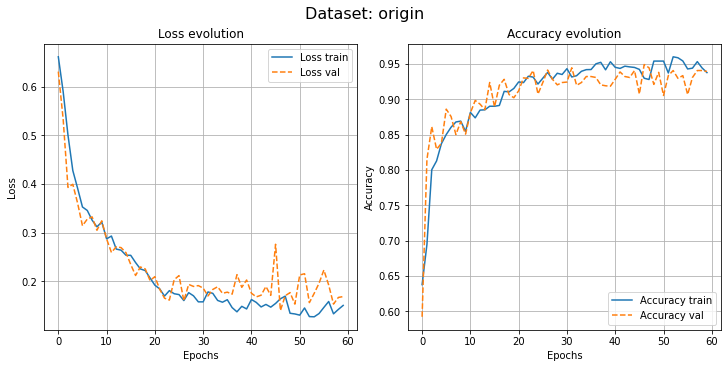

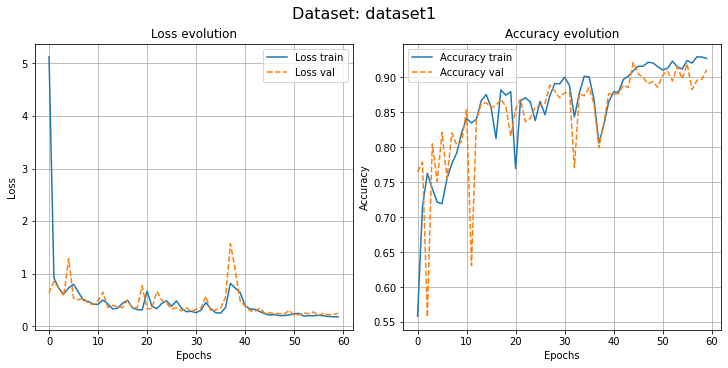

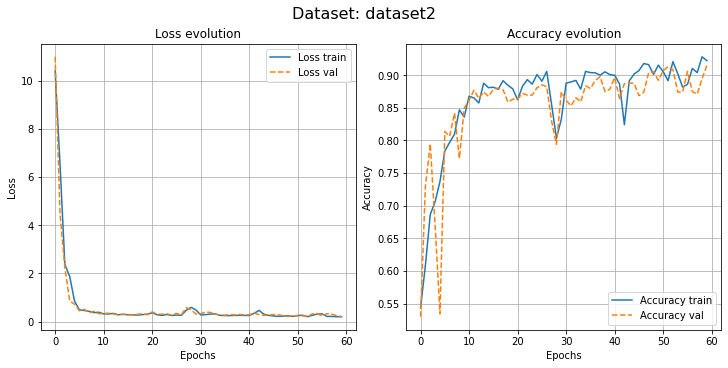

TypeError: 'function' object is not iterable

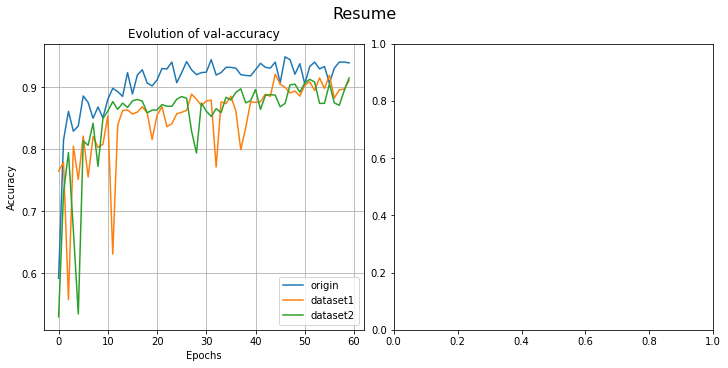

In [9]:
plot_hist(models)

# Save the three models

In [8]:
path = '../models/GAT/'
for name, model, _, _ in models:
    torch.save(model, f'{path}GAT_{name}')